In [1]:
import numpy as np
import torch
from cebmf_torch.torch_ebnm_point_laplace import ebnm_point_laplace

In [2]:
x = torch.tensor([0.0, 1.0, -0.5])
s = torch.tensor([1.0, 0.2, 1.0])
res = ebnm_point_laplace(x, s , pen_pi0=0)
expected_log_lik = -4.161880337595547
expected_post_mean = np.array([0.0, 0.9326135, -0.15496329])



tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)
tensor(-0., grad_fn=<MulBackward0>)


In [3]:
res.log_lik# should be close to , expected_log_lik

-4.162665843963623

In [4]:
res.post_mean

tensor([ 0.0000,  0.9330, -0.1555], dtype=torch.float64)

In [ ]:
import torch
import math
import random
from cebmf_torch.torch_ebnm_point_exp import ebnm_point_exp 
from cebmf_torch.torch_ebnm_point_laplace import  ebnm_point_laplace
# If you saved the previous implementation in torch_only_point_exponential.py:
# from torch_only_point_exponential import ebnm_point_exp_solver
seed = 1234
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
dtype = torch.float64
device = "cpu"

# Generate data (same structure as your NumPy snippet)
true_val1 =  torch.randn(10000, dtype=dtype, device=device)          # ~ N(0,1)
true_val0 = torch.zeros(20000, dtype=dtype, device=device)

observations_mu_1 = true_val1 + torch.randn(10000, dtype=dtype, device=device)  # add N(0,1) noise
observations_mu_0 = true_val0 + torch.randn(20000, dtype=dtype, device=device)  # add N(0,1) noise

betahat =  torch.cat([observations_mu_1, observations_mu_0], dim=0)            # shape (300,)
sebetahat = torch.ones_like(betahat)                                          # all s = 1

# Fit point-exponential EBNM
res = ebnm_point_laplace(
    x=betahat,
    s=sebetahat,pen_pi0=10# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1),
)

res0 = ebnm_point_exp (
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

tensor(2.1269, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1691, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1934, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1788, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1542, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.9372, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(4.5862e-12, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.1108, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.4288, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.1703, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.9948, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.8169, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.8927, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.9134, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.9131, dtype=torch.float64, grad_fn=<MulBackward0>)


In [6]:
import matplotlib.pyplot as plt
import torch

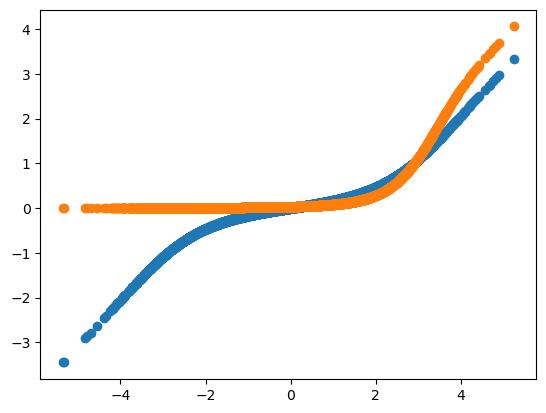

In [7]:

plt.scatter(betahat,res.post_mean)
plt.scatter(betahat,res0.post_mean)

In [8]:
res.pi0

0.40128427716295445

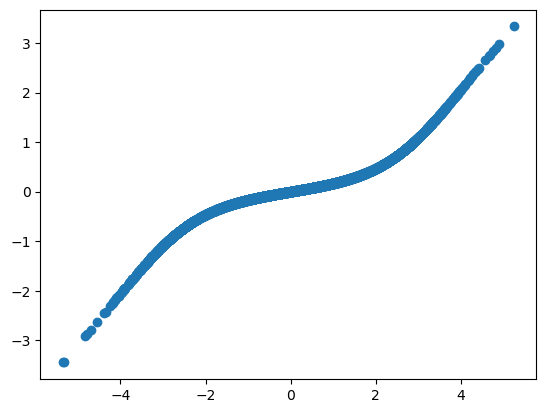

In [9]:
plt.scatter(betahat,res.post_mean)